In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder,MinMaxScaler 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('data.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [7]:
df['Region_Code'].nunique()

53

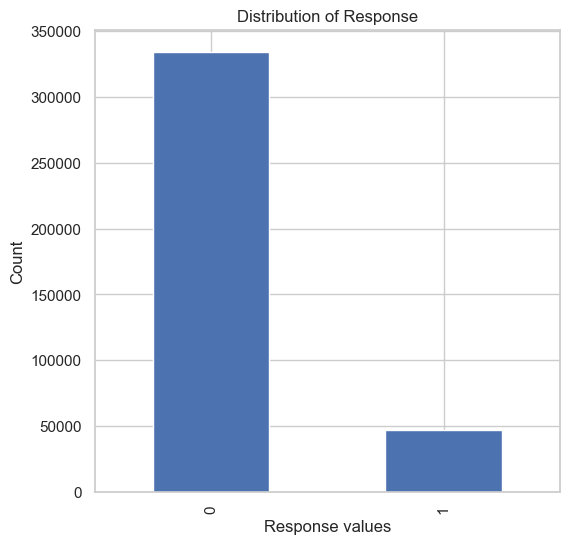

In [8]:
value_counts=df['Response'].value_counts()

plt.figure(figsize=(6,6))

value_counts.plot(kind='bar')

plt.xlabel('Response values')

plt.ylabel('Count')

plt.title("Distribution of Response")

plt.show()

<Axes: >

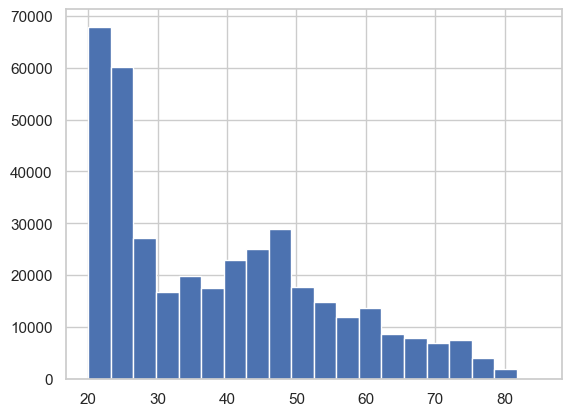

In [9]:
df['Age'].hist(bins=20)

In [10]:
df['Age'].nunique()

66

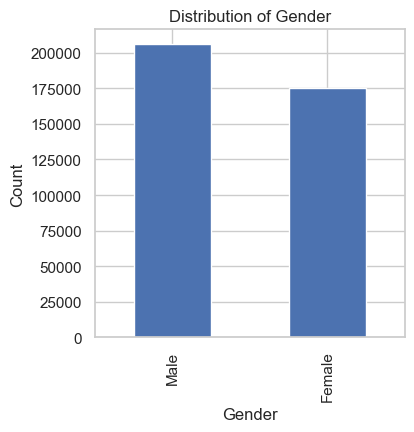

In [11]:
value_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()

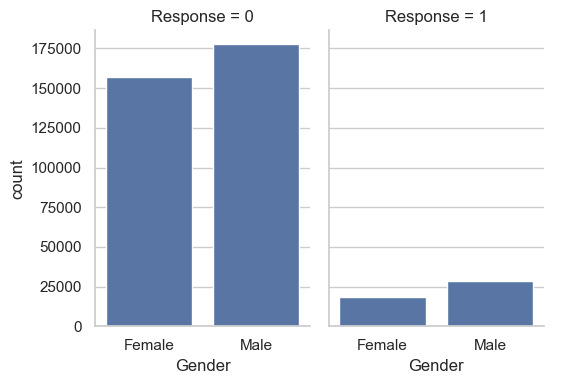

In [12]:
data=df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

g = sns.catplot(x="Gender", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);

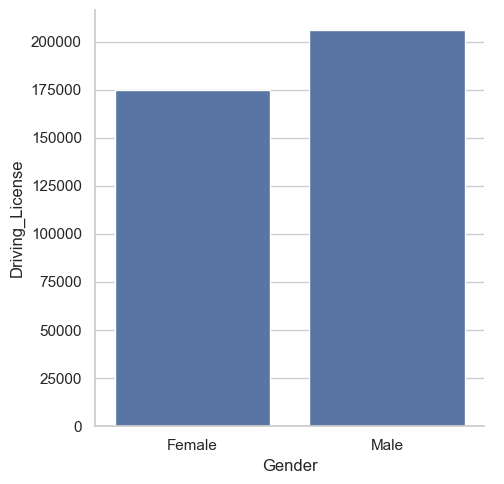

In [13]:
data=df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License", data=data, kind="bar");

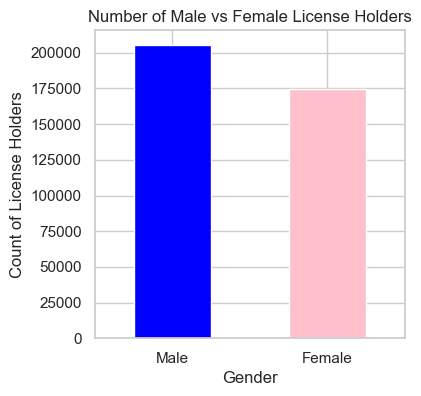

In [14]:
license_holders = df[df['Driving_License'] == 1]

# Group by Gender and count the number of license holders per gender
gender_counts = license_holders['Gender'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Male vs Female License Holders')
plt.xlabel('Gender')
plt.ylabel('Count of License Holders')
plt.xticks(rotation=0)
plt.show()

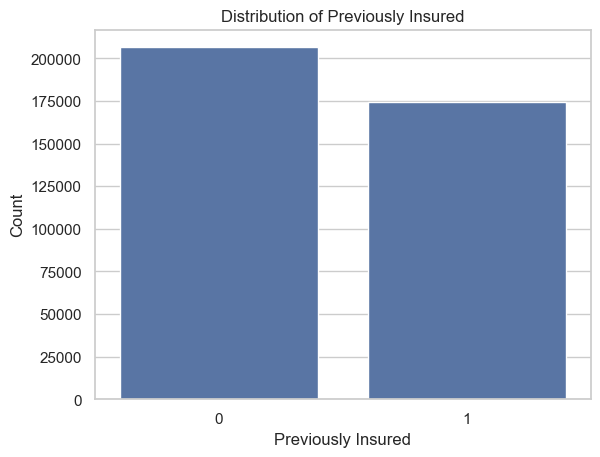

In [15]:
sns.countplot(x="Previously_Insured", data=df)
plt.title("Distribution of Previously Insured")
plt.xlabel("Previously Insured")
plt.ylabel("Count")
plt.show()

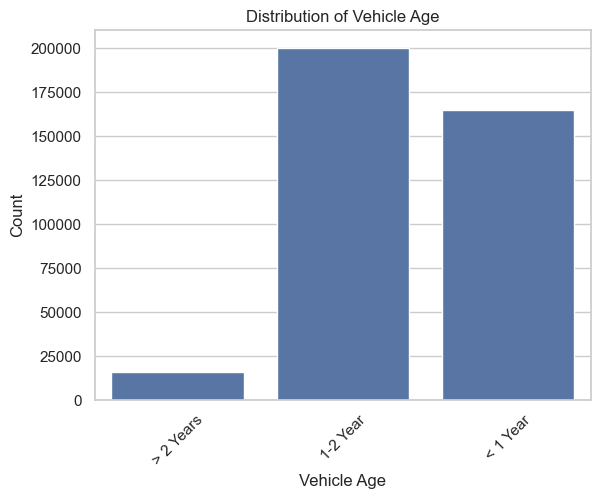

In [16]:
sns.countplot(x='Vehicle_Age', data=df)
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Age')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()

In [17]:
data=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


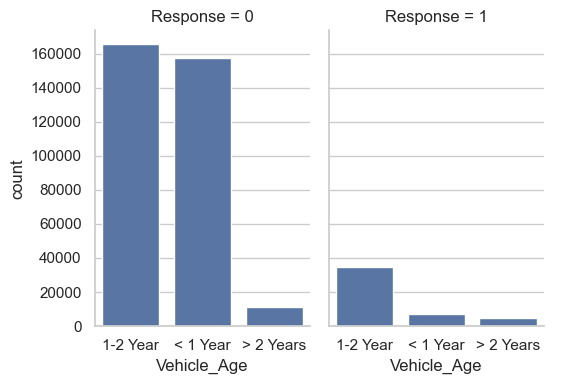

In [18]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=data, kind="bar",
                height=4, aspect=.7);

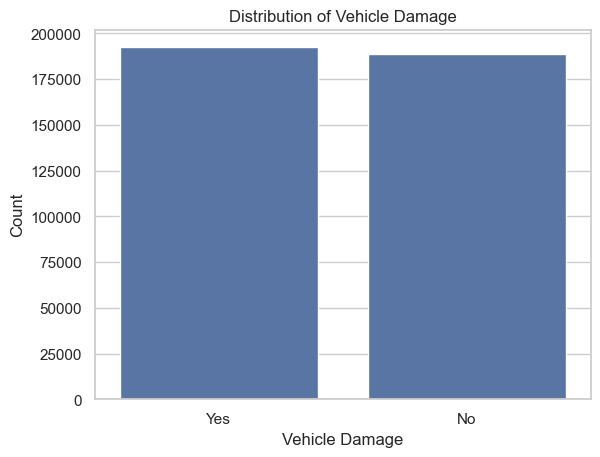

In [19]:
sns.countplot(data=df, x='Vehicle_Damage')
plt.title('Distribution of Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

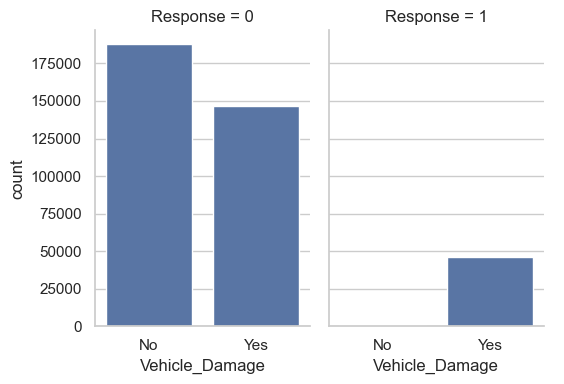

In [20]:
data = df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);

In [21]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [22]:
df = df.drop(columns=["id"])

In [23]:
df['Policy_Sales_Channel'].nunique()

155

In [24]:
df = pd.get_dummies(df, columns=["Vehicle_Age"], drop_first=True)

In [25]:
channel_means = df.groupby("Policy_Sales_Channel")["Response"].mean()
df["Policy_Sales_Channel_TE"] = df["Policy_Sales_Channel"].map(channel_means)
df = df.drop(columns=["Policy_Sales_Channel"])

In [26]:
df = pd.get_dummies(df, columns=["Gender", "Region_Code"], drop_first=True)

In [27]:
df.head()

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Policy_Sales_Channel_TE,Gender_Male,Region_Code_1.0,Region_Code_2.0,Region_Code_3.0,Region_Code_4.0,Region_Code_5.0,Region_Code_6.0,Region_Code_7.0,Region_Code_8.0,Region_Code_9.0,Region_Code_10.0,Region_Code_11.0,Region_Code_12.0,Region_Code_13.0,Region_Code_14.0,Region_Code_15.0,Region_Code_16.0,Region_Code_17.0,Region_Code_18.0,Region_Code_19.0,Region_Code_20.0,Region_Code_21.0,Region_Code_22.0,Region_Code_23.0,Region_Code_24.0,Region_Code_25.0,Region_Code_26.0,Region_Code_27.0,Region_Code_28.0,Region_Code_29.0,Region_Code_30.0,Region_Code_31.0,Region_Code_32.0,Region_Code_33.0,Region_Code_34.0,Region_Code_35.0,Region_Code_36.0,Region_Code_37.0,Region_Code_38.0,Region_Code_39.0,Region_Code_40.0,Region_Code_41.0,Region_Code_42.0,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
0,44,1,0,Yes,40454.0,217,1,False,True,0.199385,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,76,1,0,No,33536.0,183,0,False,False,0.199385,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,47,1,0,Yes,38294.0,27,1,False,True,0.199385,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,21,1,1,No,28619.0,203,0,True,False,0.028624,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,29,1,1,No,27496.0,39,0,True,False,0.028624,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df["Vehicle_Damage"] = df["Vehicle_Damage"].map({"Yes": 1, "No": 0})

In [29]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [30]:
df.head()

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Policy_Sales_Channel_TE,Gender_Male,Region_Code_1.0,Region_Code_2.0,Region_Code_3.0,Region_Code_4.0,Region_Code_5.0,Region_Code_6.0,Region_Code_7.0,Region_Code_8.0,Region_Code_9.0,Region_Code_10.0,Region_Code_11.0,Region_Code_12.0,Region_Code_13.0,Region_Code_14.0,Region_Code_15.0,Region_Code_16.0,Region_Code_17.0,Region_Code_18.0,Region_Code_19.0,Region_Code_20.0,Region_Code_21.0,Region_Code_22.0,Region_Code_23.0,Region_Code_24.0,Region_Code_25.0,Region_Code_26.0,Region_Code_27.0,Region_Code_28.0,Region_Code_29.0,Region_Code_30.0,Region_Code_31.0,Region_Code_32.0,Region_Code_33.0,Region_Code_34.0,Region_Code_35.0,Region_Code_36.0,Region_Code_37.0,Region_Code_38.0,Region_Code_39.0,Region_Code_40.0,Region_Code_41.0,Region_Code_42.0,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
0,44,1,0,1,40454.0,217,1,0,1,0.199385,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,76,1,0,0,33536.0,183,0,0,0,0.199385,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,47,1,0,1,38294.0,27,1,0,1,0.199385,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,1,1,0,28619.0,203,0,1,0,0.028624,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,29,1,1,0,27496.0,39,0,1,0,0.028624,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [31]:
x = df.drop(columns=["Response"])
y = df["Response"]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
clf=RandomForestClassifier(class_weight='balanced',n_estimators=20,random_state=42)

In [34]:
clf.fit(x_train,y_train)

,n_estimators,20
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
y_pred=clf.predict(x_test)

In [38]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66699
           1       0.37      0.12      0.18      9523

    accuracy                           0.86     76222
   macro avg       0.63      0.54      0.55     76222
weighted avg       0.82      0.86      0.83     76222



In [39]:
from sklearn.model_selection import RandomizedSearchCV


In [43]:
param_dist = {
    "n_estimators": [50, 75, 100],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None],
    "class_weight": ["balanced", {0:1, 1:3}, {0:1, 1:5}]
}

In [47]:
search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,       # number of random combos to try
    cv=5,            # 5-fold cross-validation
    scoring="f1",    # focus on F1 for minority class
    random_state=42,
    verbose=2
)

In [48]:
search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END class_weight={0: 1, 1: 5}, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  25.5s
[CV] END class_weight={0: 1, 1: 5}, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  24.0s
[CV] END class_weight={0: 1, 1: 5}, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  24.5s
[CV] END class_weight={0: 1, 1: 5}, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  24.0s
[CV] END class_weight={0: 1, 1: 5}, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  32.6s
[CV] END class_weight=balanced, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=75; total time= 2.0min
[CV] END class_weight=balanced, max_depth=10, max_features=N

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'class_weight': ['balanced', {0: 1, 1: 3}, ...], 'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,20
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [49]:
print("Best Params:", search.best_params_)

Best Params: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 30, 'class_weight': {0: 1, 1: 5}}


In [50]:
best_clf = RandomForestClassifier(
    **search.best_params_,
    random_state=42
)

In [51]:
best_clf.fit(x_train, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
y_pred = best_clf.predict(x_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     66699
           1       0.32      0.81      0.46      9523

    accuracy                           0.76     76222
   macro avg       0.64      0.79      0.66     76222
weighted avg       0.89      0.76      0.80     76222



In [59]:
y_prob = best_clf.predict_proba(x_test)[:, 1]
y_pred_thresh = (y_prob > 0.3).astype(int)  # try 0.3 instead of 0.5
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.99      0.64      0.78     66699
           1       0.28      0.95      0.43      9523

    accuracy                           0.68     76222
   macro avg       0.63      0.80      0.60     76222
weighted avg       0.90      0.68      0.74     76222



In [60]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

y_prob = best_clf.predict_proba(x_test)[:,1]

thresholds = np.arange(0.1, 0.9, 0.1)
for t in thresholds:
    y_pred_t = (y_prob > t).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_t, average="binary")
    print(f"Threshold={t:.1f} | Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")


Threshold=0.1 | Precision=0.237, Recall=0.993, F1=0.382
Threshold=0.2 | Precision=0.260, Recall=0.977, F1=0.410
Threshold=0.3 | Precision=0.276, Recall=0.954, F1=0.428
Threshold=0.4 | Precision=0.298, Recall=0.903, F1=0.448
Threshold=0.5 | Precision=0.324, Recall=0.813, F1=0.463
Threshold=0.6 | Precision=0.353, Recall=0.653, F1=0.458
Threshold=0.7 | Precision=0.415, Recall=0.217, F1=0.285
Threshold=0.8 | Precision=0.546, Recall=0.006, F1=0.011
